In [1]:
import librosa
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import IPython.display as ipd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
#Loading training and testing files
#Computing STFT on all the files
s, sr = librosa.load('train_clean_male.wav', sr=None)
S = librosa.stft(s, n_fft=1024, hop_length=512)

sn, sr = librosa.load('train_dirty_male.wav', sr=None)
X = librosa.stft(sn, n_fft=1024, hop_length=512)

x_test, sr = librosa.load('test_x_01.wav', sr=None)
X_test = librosa.stft(x_test, n_fft=1024, hop_length=512)

x_test2, sr = librosa.load('test_x_02.wav', sr=None)
X_test2 = librosa.stft(x_test2, n_fft=1024, hop_length=512)

In [3]:
#Calculation of magnitude of all the input files
mag_S = np.abs(S)
mag_X = np.abs(X)
mag_X_test = np.abs(X_test)
mag_X_test2 = np.abs(X_test2)

#Defining model specifications
learning_rate = 0.0002
num_epochs = 1000

In [4]:
input = tf.placeholder(tf.float32, [None, 513])
labels = tf.placeholder(tf.float32, [None, 513])

In [5]:
def getModel(x):
  # Input Layer
  input_layer = tf.reshape(x, [-1, 513, 1])

  # Convolutional Layer #1
  conv1 = tf.layers.conv1d(
      inputs=input_layer,
      filters=16,
      kernel_size=16,
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  pool1 = tf.layers.max_pooling1d(inputs=conv1, pool_size=2, strides=2)

  # Convolutional Layer #2 and Pooling Layer #2
  conv2 = tf.layers.conv1d(
      inputs=pool1,
      filters=32,
      kernel_size=8,
      padding="same",
      activation=tf.nn.relu)
  
  pool2 = tf.layers.max_pooling1d(inputs=conv2, pool_size=2, strides=2)

  # Dense Layer
  pool2_flat = tf.layers.flatten(pool2)
  
  logits = tf.layers.dense(inputs=pool2_flat, units=513, activation=tf.nn.relu)
  
  return logits

In [6]:
output = getModel(input)
#Defining the loss function along with its optimizer
loss = tf.reduce_mean(tf.square(output - labels))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

count = 0
batch_size = 100
flag = True

while flag:
    size = 0
    #Mini batching with the given batch size
    for i in range(0 , 2459, batch_size):
        size += batch_size
        if size <= 2459:
            batch_x = mag_X[:,i : size]
            batch_y = mag_S[:,i : size]
        else:
            batch_x = mag_X[:,i : 2459]
            batch_y = mag_S[:,i : 2459]
       
        feed_dict = {input: batch_x.T, labels: batch_y.T}
        train_step.run(feed_dict=feed_dict)
   
    if count%2 == 0:        
        loss_calc = loss.eval(feed_dict=feed_dict)
        print("Epoch %d, loss %g"%(count, loss_calc))
    
    #Once all the epochs are completed, training is stopped
    if count >= num_epochs:
        flag = False  
        
    count+=1

C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\legacy_tf_layers\convolutional.py:202: UserWarning: `tf.layers.conv1d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv1D` instead.
  warnings.warn('`tf.layers.conv1d` is deprecated and '
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\legacy_tf_layers\pooling.py:160: UserWarning: `tf.layers.max_pooling1d` is deprecated and will be removed in a future version. Please use `tf.keras.layers.MaxPooling1D` instead.
  warnings.warn('`tf.layers.max_pooling1d` is deprecated and '
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\legacy_tf_layers\core.py:329: UserWarning: `tf.layers.flatten` is dep

Epoch 0, loss 0.0127375
Epoch 2, loss 0.00856482
Epoch 4, loss 0.00694965
Epoch 6, loss 0.00555794
Epoch 8, loss 0.00429112
Epoch 10, loss 0.00355224
Epoch 12, loss 0.00311731
Epoch 14, loss 0.00281695
Epoch 16, loss 0.0025776
Epoch 18, loss 0.00236361
Epoch 20, loss 0.00221721
Epoch 22, loss 0.00210539
Epoch 24, loss 0.00199769
Epoch 26, loss 0.00192094
Epoch 28, loss 0.0018559
Epoch 30, loss 0.00178524
Epoch 32, loss 0.00177366
Epoch 34, loss 0.0016999
Epoch 36, loss 0.00167053
Epoch 38, loss 0.00164519
Epoch 40, loss 0.00162113
Epoch 42, loss 0.00156994
Epoch 44, loss 0.00154689
Epoch 46, loss 0.00150427
Epoch 48, loss 0.00147683
Epoch 50, loss 0.00145489
Epoch 52, loss 0.00143662
Epoch 54, loss 0.00141654
Epoch 56, loss 0.00140853
Epoch 58, loss 0.00139054
Epoch 60, loss 0.00137884
Epoch 62, loss 0.00135506
Epoch 64, loss 0.00136989
Epoch 66, loss 0.00131634
Epoch 68, loss 0.00130462
Epoch 70, loss 0.00129174
Epoch 72, loss 0.00126543
Epoch 74, loss 0.00126352
Epoch 76, loss 0.0012

Epoch 596, loss 0.000538652
Epoch 598, loss 0.000524848
Epoch 600, loss 0.000507814
Epoch 602, loss 0.000517747
Epoch 604, loss 0.000528971
Epoch 606, loss 0.000498516
Epoch 608, loss 0.000504062
Epoch 610, loss 0.00051839
Epoch 612, loss 0.000495159
Epoch 614, loss 0.000496275
Epoch 616, loss 0.000501407
Epoch 618, loss 0.000484282
Epoch 620, loss 0.000489264
Epoch 622, loss 0.000493155
Epoch 624, loss 0.000488465
Epoch 626, loss 0.000493918
Epoch 628, loss 0.000480196
Epoch 630, loss 0.000494318
Epoch 632, loss 0.000488689
Epoch 634, loss 0.000487279
Epoch 636, loss 0.000499062
Epoch 638, loss 0.000500691
Epoch 640, loss 0.000485174
Epoch 642, loss 0.000505444
Epoch 644, loss 0.000506043
Epoch 646, loss 0.000489027
Epoch 648, loss 0.000500875
Epoch 650, loss 0.000506317
Epoch 652, loss 0.00048945
Epoch 654, loss 0.000505555
Epoch 656, loss 0.000530614
Epoch 658, loss 0.000495625
Epoch 660, loss 0.00050603
Epoch 662, loss 0.000542069
Epoch 664, loss 0.000502255
Epoch 666, loss 0.00048

In [12]:
#Calculating the output from the given input, trained model and layer number
def feedforward(input_data, dnn_output):
    output = dnn_output.eval(feed_dict = {input : input_data})
    
    return output

#Recovering the complex values of the file from the output of the model
def recover_sound(X , mag_X , mag_output):
  temp = X / mag_X
  s_hat = temp * mag_output
  
  return s_hat

In [13]:
#Computing the output from the model for both the test files
s_hat_test1 = feedforward(mag_X_test.T , output)
s_hat_test2 = feedforward(mag_X_test2.T , output)

#Recovering the complex values of both the test files
s_hat1 = recover_sound(X_test , mag_X_test , s_hat_test1.T)
s_hat2 = recover_sound(X_test2 , mag_X_test2 , s_hat_test2.T)

In [14]:
#Reconstructing the test files after removing noise

recon_sound = librosa.istft(s_hat1 , hop_length=512 , win_length=1024)
sf.write('test_s_01_recons_q1.wav',  recon_sound, sr)

# data, samplerate = sf.read('existing_file.wav')
recon_sound2 = librosa.istft(s_hat2 , hop_length=512 , win_length=1024)
sf.write('test_s_02_recons_q1.wav',recon_sound2, sr)

In [15]:
#For testing purpose, feeding the model with train_dirty_male file
#From the output generated, reconstructing the audio file
s_hat_test3 = feedforward(mag_X.T , output)
s_hat3 = recover_sound(X, mag_X , s_hat_test3.T)
recon_sound3 = librosa.istft(s_hat3 , hop_length=512 , win_length=1024)
size_recon_sound3 = np.shape(recon_sound3)[0]

In [16]:
#Once the audio file is generated, calculating the SNR value
s = s[: size_recon_sound3]
num = np.dot(s.T , s)
den = np.dot((s - recon_sound3).T,(s - recon_sound3))
SNR = 10 * np.log10(num/den)
print('Value of SNR : ' + str(SNR))

Value of SNR : 17.64175057411194


In [28]:
# Noisy audio file 1 input
print("test_x_01 dirty\n")
ipd.Audio('test_x_01.wav')

test_x_01 dirty



In [29]:
# 1D CNN denoised audio file 1 output
print("1D CNN output_test_x_01\n")
ipd.Audio('test_s_01_recons_q1.wav')

1D CNN output_test_x_01



In [32]:
# Noisy audio file 2 input
print("test_x_02 dirty\n")
ipd.Audio('test_x_02.wav')

test_x_02 dirty



In [33]:
# 1D CNN denoised audio file 2 output
print("1D CNN output_test_x_02\n")
ipd.Audio('test_s_02_recons_q1.wav')

1D CNN output_test_x_02



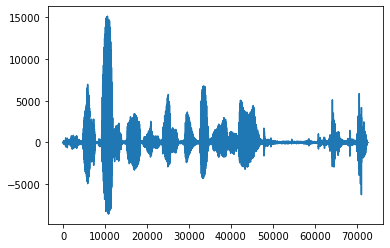

In [30]:
# Test noisy audio file 1
rate, data = wav.read('test_x_01.wav')
%matplotlib inline
plt.plot(data)
plt.show()

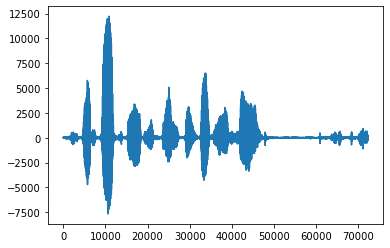

In [31]:
# 1D CNN denoised audio file 1
rate, data = wav.read('test_s_01_recons_q1.wav')
%matplotlib inline
plt.plot(data)
plt.show()

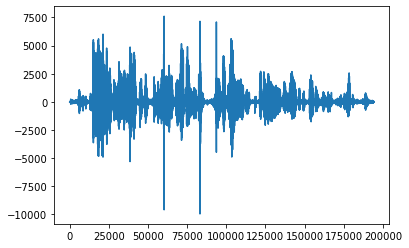

In [34]:
# Test noisy audio file 2
rate, data = wav.read('test_x_02.wav')
%matplotlib inline
plt.plot(data)
plt.show()

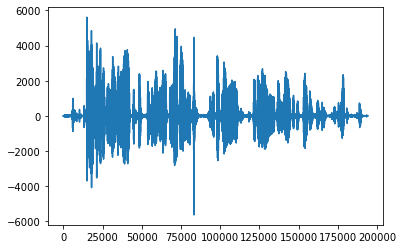

In [35]:
# 1D CNN denoised audio file 2
rate, data = wav.read('test_s_02_recons_q1.wav')
%matplotlib inline
plt.plot(data)
plt.show()